In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import jovian
project_name = 'carprice'

pd.set_option('display.max_rows', 200)
pd.set_option('display.max_columns', 200)

In [29]:
def fit_predict(estimator, x_train=x_train, train_targets=train_targets, x_val=x_val, 
                val_targets=val_targets):
    estimator.fit(x_train, train_targets)
    train_preds = estimator.predict(x_train)
    val_preds = estimator.predict(x_val)

    from sklearn.metrics import mean_squared_error
    
    train_error = np.sqrt(mean_squared_error(train_targets, train_preds))
    val_error = np.sqrt(mean_squared_error(val_targets, val_preds))
    
    
    print('Train RMSLE:', train_error)
    print('Val RMSLE:', val_error)
    
    # LOGGING MODELLING PARAMS
    
    log = pd.read_excel('model_params_metrics.xlsx')
    
    size= len(log.index)
    log.loc[size] = np.nan
    log.loc[size, 'Date'] = datetime.now()
    log.loc[size,'estimator'] = str(estimator)
    log.loc[size,'hyperparams'] = str(estimator.get_params())[1:-1]
    log.loc[size, 'train_RMSLE'] = train_error
    log.loc[size, 'val_RMSLE'] = val_error
    
    log.to_excel('model_params_metrics.xlsx', index=False)
    log.tail()
    
# def log_model_metrics(estimator):
#     dflog = dflogfinal.values.flatten()
#     dflog = np.append(dflog, [time, str(estimator), params, train_error, val_error])
#     dflogfinal = dflog.reshape(-1, 5)
#     print(pd.DataFrame(dflogfinal, columns = ['time', 'model', 'hyperparams','train_error','val_error']))

In [4]:
df = pd.read_csv('train.csv')
df = df.drop('ID', axis=1)

In [5]:
df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
df.dtypes

Price                 int64
Levy                 object
Manufacturer         object
Model                object
Prod. year            int64
Category             object
Leather interior     object
Fuel type            object
Engine volume        object
Mileage              object
Cylinders           float64
Gear box type        object
Drive wheels         object
Doors                object
Wheel                object
Color                object
Airbags               int64
dtype: object

In [7]:
df.isnull().sum()

Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [8]:
df['Price'].describe()

count    1.923700e+04
mean     1.855593e+04
std      1.905813e+05
min      1.000000e+00
25%      5.331000e+03
50%      1.317200e+04
75%      2.207500e+04
max      2.630750e+07
Name: Price, dtype: float64

###  Manufacture and model

In [15]:
df['Manufacturer'].value_counts(dropna=False)[:20]

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
BMW              1049
LEXUS             982
HONDA             977
NISSAN            660
VOLKSWAGEN        579
SSANGYONG         441
KIA               421
OPEL              397
MITSUBISHI        289
SUBARU            275
AUDI              255
MAZDA             183
JEEP              138
DAEWOO             91
DODGE              91
Name: Manufacturer, dtype: int64

<AxesSubplot:ylabel='Manufacturer'>

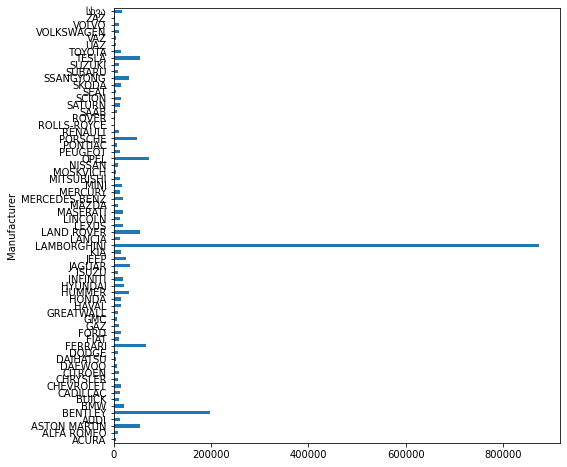

In [10]:
plt.figure(figsize=(8,8))
df.groupby('Manufacturer')['Price'].mean().plot(kind='barh')

In [22]:
df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)

Manufacturer
LAMBORGHINI    872946.000000
BENTLEY        197574.500000
OPEL            73305.617128
FERRARI         66955.500000
LAND ROVER      54053.489796
                   ...      
VAZ              4613.583333
MOSKVICH         4609.000000
ZAZ              3822.500000
ROVER            2433.333333
ROLLS-ROYCE       178.500000
Name: Price, Length: 65, dtype: float64

In [ ]:
df['cost'] = df['Price']

In [27]:
df['Levy'].value_counts(dropna=False).sort_index()

-       5819
1011       8
1016       4
1017     298
1018     135
        ... 
986       40
988       32
993        3
994        5
997        1
Name: Levy, Length: 559, dtype: int64

In [9]:
df['Levy'] = df['Levy'].apply()

0        1399
1        1018
2           -
3         862
4         446
         ... 
19232       -
19233     831
19234     836
19235    1288
19236     753
Name: Levy, Length: 19237, dtype: object

In [34]:
df['Levy'].replace('-', np.nan, inplace=True)
df['Levy'].isnull().sum()
df['Levy'] = df['Levy'].astype('float32')

In [35]:
df['cost'] = df['Price'] + df['Levy'].fillna(0)

In [37]:
df['cost'].describe()

count    1.923700e+04
mean     1.918837e+04
std      1.905795e+05
min      1.000000e+00
25%      5.871000e+03
50%      1.365500e+04
75%      2.281100e+04
max      2.630750e+07
Name: cost, dtype: float64

In [86]:
df['outlier'] = 0

In [89]:
df.loc[df['Price']>1000000]
# confirmed outlier

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Fuel type,Engine volume,Mileage,...,Doors,Wheel,Color,Airbags,cost,leather,engine,turbo,gearbox,outlier
16983,45812886,26307500.0,NaN,OPEL,Combo,1999,Goods wagon,Diesel,1.7,99999.0,...,2,Left wheel,Blue,0,26307500.0,0,1.700195,0,Manual,1


In [88]:
df.loc[df['Price']>1000000,'outlier'] = 1

In [101]:
df = df.loc[df['outlier'] == 0]

#### Some columnsa are marked object but are actually numerbs

In [18]:
df.select_dtypes('object').head()

,Manufacturer,Model,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Doors,Wheel,Color
0,LEXUS,RX 450,Jeep,Yes,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,CHEVROLET,Equinox,Jeep,No,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,HONDA,FIT,Hatchback,No,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black
3,FORD,Escape,Jeep,Yes,Hybrid,2.5,168966 km,Automatic,4x4,04-May,Left wheel,White
4,HONDA,FIT,Hatchback,Yes,Petrol,1.3,91901 km,Automatic,Front,04-May,Left wheel,Silver


In [43]:
df.select_dtypes('object').columns

Index(['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type',
       'Engine volume', 'Mileage', 'Gear box type', 'Drive wheels', 'Doors',
       'Wheel', 'Color'],
      dtype='object')

#### leather

In [45]:
df['Leather interior'].value_counts()

Yes    13954
No      5283
Name: Leather interior, dtype: int64

In [48]:
df['leather'] = df['Leather interior'].map({'Yes':1, 'No':0})
df = df.drop('Leather interior', axis=1)
df['leather'].value_counts()

1    13954
0     5283
Name: leather, dtype: int64

#### fuel type

In [47]:
df['Fuel type'].value_counts()

Petrol            10150
Diesel             4036
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: Fuel type, dtype: int64

#### engine volume

In [19]:
sorted(df['Engine volume'].unique())[:10]

['0',
 '0.1',
 '0.2',
 '0.2 Turbo',
 '0.3',
 '0.3 Turbo',
 '0.4',
 '0.4 Turbo',
 '0.5',
 '0.6']

In [54]:
df['engine'] = df['Engine volume']

In [60]:
df['engine'].apply(lambda x: 0 if len(x)<4 else 1).sum()

1931

In [63]:
df['turbo'] = df['engine'].apply(lambda x: 0 if x.find('Turbo') == -1 else 1)
df['turbo']

0        0
1        0
2        0
3        0
4        0
        ..
19232    1
19233    0
19234    0
19235    0
19236    0
Name: turbo, Length: 19237, dtype: int64

In [169]:
# df['engine'] = df['engine'].str.replace(' Turbo','')
sorted(df['engine'].unique())[:5]

[0.0, 0.1, 0.2, 0.3, 0.4]

In [66]:
df['engine'] = df['engine'].astype('float16')

#### Mileage

In [68]:
sorted(df['Mileage'].unique())[:5]

['0 km', '1000 km', '10000 km', '100000 km', '1000000 km']

In [69]:
df['Mileage'] = df['Mileage'].str.replace(' km','')

In [70]:
df['Mileage'] = df['Mileage'].astype('float32')

#### gearbox

In [72]:
df['gearbox'] = df['Gear box type']
df = df.drop('Gear box type', axis=1)
df['gearbox'].value_counts()

Automatic    13514
Tiptronic     3102
Manual        1875
Variator       746
Name: gearbox, dtype: int64

#### Drive wheels

In [74]:
df['Drive wheels'].value_counts(dropna=False)

Front    12874
4x4       4058
Rear      2305
Name: Drive wheels, dtype: int64

In [76]:
df['Doors'].value_counts()

04-May    18332
02-Mar      777
>5          128
Name: Doors, dtype: int64

In [77]:
df['Doors'] = df['Doors'].map({'04-May':'4','02-Mar':'2','>5':'5'})
df['Doors'].value_counts()

4    18332
2      777
5      128
Name: Doors, dtype: int64

#### Wheel and color

In [79]:
df['Wheel'].value_counts()

Left wheel          17753
Right-hand drive     1484
Name: Wheel, dtype: int64

In [82]:
df['Price'] = df['Price'].astype('float32')

<AxesSubplot:xlabel='price', ylabel='color'>

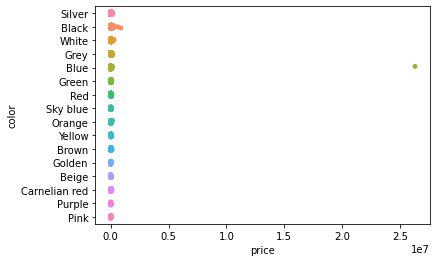

In [107]:
sns.stripplot(data=df,y='color',x='price')

In [103]:
df.loc[:,'logprice'] = np.log(df['Price'])

C:\Users\Anshu\anaconda3\lib\site-packages\pandas\core\indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


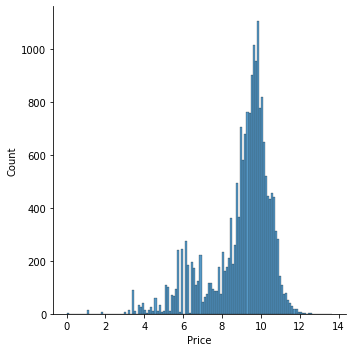

In [105]:
sns.displot(x=np.log(df.loc[df['outlier']==0]['Price']))

In [106]:
df['Levy'].isnull().sum()

5818

In [ ]:
df['Levy'] = df['Levy'].fillna(1)

<AxesSubplot:xlabel='Levy', ylabel='Price'>

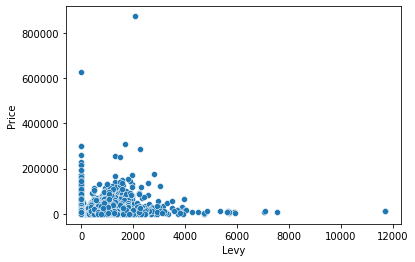

In [108]:
sns.scatterplot(x=df['Levy'].fillna(1), y=df['Price'])

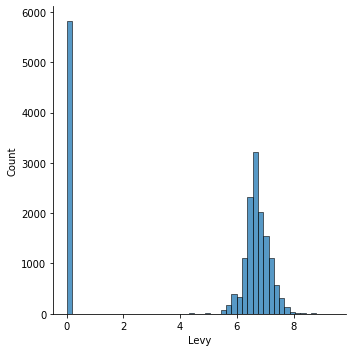

In [113]:
sns.displot(np.log(df['Levy'].fillna(1)), bins=50)

### 03-07-2021 -  cleaning and preprocessing

#### First, remove null values and bring to proper format

In [149]:
df = pd.read_csv('train.csv')
df = df.drop('ID', axis=1)
dfc = df.copy()
df.head(2)

,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Price
0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,13328
1,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,16621


- bring data into correct format (remove 'Turbo', km, '-', etc)
- study the relationship of each variable with target (visualise)
- apply log transformation to price
- apply box-cox transformation where required

- replace the price of outliers by average price of that car in dataset

In [51]:
dff['Levy'].value_counts()

-       8273
765      708
891      665
640      582
639      575
        ... 
3268       1
1590       1
3273       1
3301       1
1678       1
Name: Levy, Length: 635, dtype: int64

#### Cleaning and format correction

In [150]:
# shortening column names
for col in df.columns:
#     print(col.lower().split()[0].replace('.',''))
    new_col = col.lower().split()[0].replace('.','')
    df[new_col] = df[col]
    df = df.drop(col, axis=1)
df.head()

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price
0,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,13328
1,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,16621
2,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,8467
3,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,3607
4,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,11726


In [91]:
df['levy'].value_counts()[:3]

-      5819
765     486
891     461
Name: levy, dtype: int64

In [152]:
df['levy'] = df['levy'].replace('-', np.nan)
df['levy'] = df['levy'].astype('float16')
df['levy'].value_counts(dropna=False)

NaN       5819
765.0      486
891.0      461
639.0      410
640.0      405
          ... 
997.0        1
556.0        1
2268.0       1
1365.0       1
1466.0       1
Name: levy, Length: 555, dtype: int64

In [153]:
df.isnull().sum()

levy            5819
manufacturer       0
model              0
prod               0
category           0
leather            0
fuel               0
engine             0
mileage            0
cylinders          0
gear               0
drive              0
doors              0
wheel              0
color              0
airbags            0
price              0
dtype: int64

In [154]:
df['leather'] = df['leather'].map({'Yes':1, 'No':0})
df['leather'].value_counts()

1    13954
0     5283
Name: leather, dtype: int64

In [94]:
df.select_dtypes('object').head(3)

,manufacturer,model,category,fuel,engine,mileage,gear,drive,doors,wheel,color
0,LEXUS,RX 450,Jeep,Hybrid,3.5,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,CHEVROLET,Equinox,Jeep,Petrol,3,192000 km,Tiptronic,4x4,04-May,Left wheel,Black
2,HONDA,FIT,Hatchback,Petrol,1.3,200000 km,Variator,Front,04-May,Right-hand drive,Black


In [155]:
df.select_dtypes('object').isnull().sum()

manufacturer    0
model           0
category        0
fuel            0
engine          0
mileage         0
gear            0
drive           0
doors           0
wheel           0
color           0
dtype: int64

In [79]:
df['manufacturer'].value_counts()

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
PONTIAC             1
LAMBORGHINI         1
HAVAL               1
ASTON MARTIN        1
GREATWALL           1
Name: manufacturer, Length: 65, dtype: int64

In [80]:
df['model'].value_counts()

Prius                1083
Sonata               1079
Camry                 938
Elantra               922
E 350                 542
                     ... 
Elantra Se              1
Range Rover VOGUE       1
Camry sport se          1
Cruze sonic             1
FIT RS                  1
Name: model, Length: 1590, dtype: int64

In [81]:
df['category'].value_counts()

Sedan          8736
Jeep           5473
Hatchback      2847
Minivan         647
Coupe           532
Universal       364
Microbus        306
Goods wagon     233
Pickup           52
Cabriolet        36
Limousine        11
Name: category, dtype: int64

In [82]:
df['fuel'].value_counts()

Petrol            10150
Diesel             4036
Hybrid             3578
LPG                 892
CNG                 494
Plug-in Hybrid       86
Hydrogen              1
Name: fuel, dtype: int64

In [95]:
df['engine'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

In [101]:
eng = df['engine']

In [102]:
eng = eng.apply(lambda x: str(x).split()[0])
eng.head()

0    3.5
1      3
2    1.3
3    2.5
4    1.3
Name: engine, dtype: object

In [103]:
eng = eng.apply(lambda x: round(float(x), 3))
eng.head()

0    3.5
1    3.0
2    1.3
3    2.5
4    1.3
Name: engine, dtype: float64

In [159]:
df['turbo'] = df['engine'].apply( lambda x: 0 if x.find('Turbo') == -1 else 1)
df['turbo'][:5]

0    0
1    0
2    0
3    0
4    0
Name: turbo, dtype: int64

In [160]:
df['turbo'] = df['engine'].apply( lambda x: 0 if x.find('Turbo') == -1 else 1)
df['engine'] = df['engine'].apply(lambda x: str(x).split()[0])
df['engine'] = df['engine'].apply(lambda x: round(float(x), 3))
df['engine'].head()

0    3.5
1    3.0
2    1.3
3    2.5
4    1.3
Name: engine, dtype: float64

In [105]:
df['engine'].value_counts()

2.0    4324
2.5    2370
1.8    1937
1.6    1578
1.5    1393
       ... 
3.1       1
0.5       1
6.8       1
6.7       1
5.2       1
Name: engine, Length: 65, dtype: int64

In [106]:
df.select_dtypes('object').head(2)

,manufacturer,model,category,fuel,mileage,gear,drive,doors,wheel,color
0,LEXUS,RX 450,Jeep,Hybrid,186005 km,Automatic,4x4,04-May,Left wheel,Silver
1,CHEVROLET,Equinox,Jeep,Petrol,192000 km,Tiptronic,4x4,04-May,Left wheel,Black


In [161]:
df['mileage'] = df['mileage'].apply(lambda x: x.split()[0])
df['mileage'] = df['mileage'].astype(int)
df['mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: mileage, Length: 19237, dtype: int32

In [120]:
df['gear'].value_counts(dropna=False)

Automatic    13514
Tiptronic     3102
Manual        1875
Variator       746
Name: gear, dtype: int64

In [121]:
df['drive'].value_counts(dropna=False)

Front    12874
4x4       4058
Rear      2305
Name: drive, dtype: int64

In [122]:
df['doors'].value_counts(dropna=False)

04-May    18332
02-Mar      777
>5          128
Name: doors, dtype: int64

In [124]:
df['doors'].value_counts().index

Index(['04-May', '02-Mar', '>5'], dtype='object')

In [162]:
df['doors'] = df['doors'].apply(lambda x: x[1:2])
df['doors'] = df['doors'].astype('uint8')
df['doors'].value_counts()

4    18332
2      777
5      128
Name: doors, dtype: int64

In [128]:
df['wheel'].value_counts()

Left wheel          17753
Right-hand drive     1484
Name: wheel, dtype: int64

In [163]:
df['wheel'] = df['wheel'].map({'Left wheel':'left', 'Right-hand drive':'right'})
df['wheel'].value_counts()

left     17753
right     1484
Name: wheel, dtype: int64

In [130]:
df['color'].value_counts()

Black            5033
White            4489
Silver           3792
Grey             2375
Blue             1396
Red               639
Green             322
Orange            253
Brown             187
Carnelian red     179
Golden            145
Beige             134
Sky blue          122
Yellow            106
Purple             39
Pink               26
Name: color, dtype: int64

In [164]:
df.head()

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo
0,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,left,Silver,12,13328,0
1,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,left,Black,8,16621,0
2,NaN,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,4,right,Black,2,8467,0
3,862.0,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,4,left,White,0,3607,0
4,446.0,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,4,left,Silver,4,11726,0


In [165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   levy          13418 non-null  float16
 1   manufacturer  19237 non-null  object 
 2   model         19237 non-null  object 
 3   prod          19237 non-null  int64  
 4   category      19237 non-null  object 
 5   leather       19237 non-null  int64  
 6   fuel          19237 non-null  object 
 7   engine        19237 non-null  float64
 8   mileage       19237 non-null  int32  
 9   cylinders     19237 non-null  float64
 10  gear          19237 non-null  object 
 11  drive         19237 non-null  object 
 12  doors         19237 non-null  uint8  
 13  wheel         19237 non-null  object 
 14  color         19237 non-null  object 
 15  airbags       19237 non-null  int64  
 16  price         19237 non-null  int64  
 17  turbo         19237 non-null  int64  
dtypes: float16(1), float64(2),

In [170]:
df.to_csv('train_cleaned.csv', index=False)

In [167]:
df[['manufacturer','model']].apply(lambda x: '_'.join([str(x['manufacturer']), str(x['model'])]), 
                                   axis=1)

0                 LEXUS_RX 450
1            CHEVROLET_Equinox
2                    HONDA_FIT
3                  FORD_Escape
4                    HONDA_FIT
                 ...          
19232    MERCEDES-BENZ_CLK 200
19233           HYUNDAI_Sonata
19234           HYUNDAI_Tucson
19235        CHEVROLET_Captiva
19236           HYUNDAI_Sonata
Length: 19237, dtype: object

### Studying relation between target and features

In [174]:
input_cols = list(df.drop('price', axis=1).columns)
target = 'price'

In [171]:
df.head(2)

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo
0,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,left,Silver,12,13328,0
1,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,left,Black,8,16621,0


In [173]:
df.sort_values('price', ascending=False)[:5]

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo
16983,NaN,OPEL,Combo,1999,Goods wagon,0,Diesel,1.7,99999,4.0,Manual,Front,2,left,Blue,0,26307500,0
8541,2068.0,LAMBORGHINI,Urus,2019,Universal,1,Petrol,4.0,2531,8.0,Tiptronic,4x4,4,left,Black,0,872946,0
1225,NaN,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,1,Petrol,6.3,0,8.0,Tiptronic,4x4,4,left,Black,12,627220,1
5008,1694.0,PORSCHE,911,2016,Coupe,1,Petrol,4.0,8690,6.0,Automatic,Rear,2,left,Black,12,308906,0
14839,NaN,LAND ROVER,Range Rover Vogue,2019,Jeep,1,Diesel,3.0,4500,8.0,Tiptronic,4x4,4,left,Black,12,297930,1


In [177]:
df.shape

(19237, 18)

#### Let us drop column number 16983 because its clearly an outlier.

In [178]:
df = df.drop(16983)
df.shape

(19236, 18)

<AxesSubplot:xlabel='price', ylabel='manufacturer'>

C:\Users\Anshu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Anshu\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 144 missing from current font.
  font.set_text(s, 0, flags=flags)


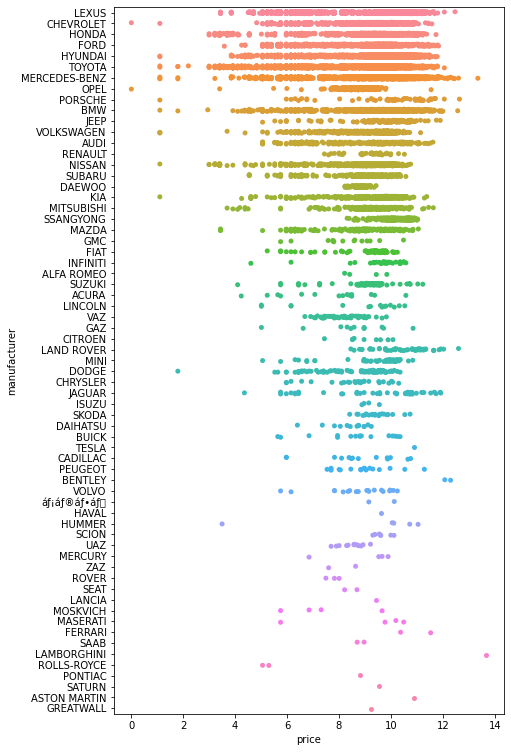

In [43]:
plt.figure(figsize=(7,13))
sns.stripplot(data=df, y='manufacturer', x='price')

In [185]:
df['manufacturer'].value_counts()[:15]

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
BMW              1049
LEXUS             982
HONDA             977
NISSAN            660
VOLKSWAGEN        579
SSANGYONG         441
KIA               421
OPEL              396
MITSUBISHI        289
SUBARU            275
Name: manufacturer, dtype: int64

- combine manufacturer and model
- convert prod year to categorical
- find age of car

#### engine

<AxesSubplot:xlabel='engine', ylabel='price'>

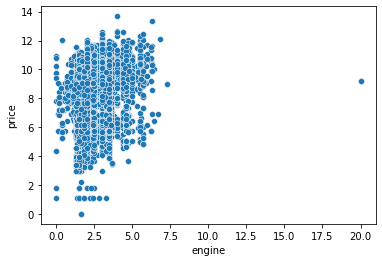

In [44]:
sns.scatterplot(data=df, x='engine', y='price')

#### 20L engine with low price is definitely an outlier

In [190]:
df.sort_values('engine', ascending=False)

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo
17777,5604.0,HYUNDAI,Sonata,2014,Sedan,1,LPG,20.0,333686,4.0,Automatic,Front,4,left,Silver,4,10036,0
2357,5604.0,HYUNDAI,Sonata,2014,Sedan,1,LPG,20.0,333686,4.0,Automatic,Front,4,left,Silver,4,10036,0
5367,5876.0,MERCEDES-BENZ,CLK 430,2005,Cabriolet,0,Petrol,7.3,156470,12.0,Automatic,Rear,4,left,Black,12,7840,0
4722,2820.0,BENTLEY,Mulsanne,2016,Sedan,1,Petrol,6.8,6189,8.0,Automatic,Rear,4,left,Black,12,175622,0
1086,1935.0,DODGE,RAM,2014,Pickup,1,Diesel,6.7,367053,6.0,Automatic,Front,4,left,White,12,1019,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2010,87.0,TESLA,Model X,2018,Sedan,1,Petrol,0.0,81907,6.0,Automatic,4x4,4,left,Silver,12,53941,0
3516,87.0,HYUNDAI,Elantra,2016,Sedan,1,LPG,0.0,65004,4.0,Automatic,Front,4,left,White,4,27356,0
12917,87.0,MERCEDES-BENZ,E 350,2016,Sedan,1,Petrol,0.0,33600,6.0,Automatic,Rear,4,left,White,12,6,0
17375,87.0,MERCEDES-BENZ,CLS 550,2014,Sedan,1,Petrol,0.0,92800,8.0,Automatic,Rear,4,left,Black,12,78,0


#### Sonata with 20L is absurd value. Try to fill it with Sonata price of same year and same spec.

In [193]:
df.loc[df['model'] =='Sonata'].sort_values('engine', ascending=False).head(10)

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo
2357,5604.0,HYUNDAI,Sonata,2014,Sedan,1,LPG,20.0,333686,4.0,Automatic,Front,4,left,Silver,4,10036,0
17777,5604.0,HYUNDAI,Sonata,2014,Sedan,1,LPG,20.0,333686,4.0,Automatic,Front,4,left,Silver,4,10036,0
3252,NaN,HYUNDAI,Sonata,2006,Sedan,1,LPG,3.3,243200,6.0,Tiptronic,Front,4,left,Black,10,10036,0
18,2386.0,HYUNDAI,Sonata,2006,Sedan,1,Petrol,3.3,295059,6.0,Automatic,Rear,4,left,Blue,12,549,0
5431,1292.0,HYUNDAI,Sonata,2016,Sedan,1,LPG,3.0,153616,4.0,Automatic,Front,4,left,Silver,4,26262,0
9481,751.0,HYUNDAI,Sonata,2013,Sedan,1,Hybrid,2.4,126690,4.0,Automatic,Front,4,left,Silver,0,2744,0
10383,749.0,HYUNDAI,Sonata,2014,Sedan,1,Petrol,2.4,173925,4.0,Automatic,Front,4,left,Silver,12,282,0
10348,NaN,HYUNDAI,Sonata,2011,Sedan,1,Petrol,2.4,174400,4.0,Automatic,Front,4,left,Black,0,15053,0
10213,751.0,HYUNDAI,Sonata,2013,Sedan,1,Petrol,2.4,216118,4.0,Automatic,Front,4,left,Grey,12,549,0
10123,753.0,HYUNDAI,Sonata,2012,Sedan,1,Petrol,2.4,215266,4.0,Automatic,Front,4,left,Grey,12,941,0


### function to do Splitting, imputing, one_hot_encoding, preparing for modelling

In [ ]:
def carprice_transform(df, istest=False)    
    # MARKING INPUT AND TARGET COLUMNS
    input_cols = df.drop(['price','logprice'], axis=1).columns
    price = df['price']
    logprice = df['logprice']

    # SPLITTING INTO TRAIN AND VAL
    from sklearn.model_selection import train_test_split
    train_inputs, val_inputs, train_targets, val_targets = train_test_split(df[input_cols],
                                                                           df['price'],
                                                                           test_size=0.3)
    # NUMERIC IMPUTATION
    numeric_cols = list(train_inputs.select_dtypes(include = np.number).columns)
    categorical_cols = list(train_inputs.select_dtypes('object').columns)

    from sklearn.impute import SimpleImputer
    num_imputer = SimpleImputer(strategy='mean')

    num_imputer.fit(train_inputs[numeric_cols])

    train_inputs[numeric_cols] = num_imputer.transform(train_inputs[numeric_cols])
    val_inputs[numeric_cols] = num_imputer.transform(val_inputs[numeric_cols])


    # CATEGORICAL IMPUTATION
    train_inputs[categorical_cols] = train_inputs[categorical_cols].fillna('Unknown')

    # ONE-HOT ENCODING CATEGORICAL DATA
    from sklearn.preprocessing import OneHotEncoder

    one_hot = OneHotEncoder(sparse=False, handle_unknown='ignore')
    one_hot.fit(df[categorical_cols])
    encoded_cols = list(one_hot.get_feature_names(categorical_cols))

    train_inputs[encoded_cols] = one_hot.transform(train_inputs[categorical_cols])
    val_inputs[encoded_cols] = one_hot.transform(val_inputs[categorical_cols])

    # GETTING FINAL TRAIN DATA
    x_train = train_inputs[numeric_cols+encoded_cols]
    x_val = val_inputs[numeric_cols+encoded_cols]

### function to do intitial preprocessing

In [83]:
def carprice_transform_train(df):
    # MARKING INPUT AND TARGET COLUMNS
    input_cols = df.drop(['price','logprice'], axis=1).columns
    price = df['price']
    logprice = df['logprice']

    # SPLITTING INTO TRAIN AND VAL
    from sklearn.model_selection import train_test_split
    train_inputs, val_inputs, train_targets, val_targets = train_test_split(df[input_cols],
                                                                           df['price'],
                                                                           test_size=0.3)
    # NUMERIC IMPUTATION
    numeric_cols = list(train_inputs.select_dtypes(include = np.number).columns)
    categorical_cols = list(train_inputs.select_dtypes('object').columns)

    from sklearn.impute import SimpleImputer
    num_imputer = SimpleImputer(strategy='mean')

    num_imputer.fit(train_inputs[numeric_cols])

    train_inputs[numeric_cols] = num_imputer.transform(train_inputs[numeric_cols])
    val_inputs[numeric_cols] = num_imputer.transform(val_inputs[numeric_cols])


    # CATEGORICAL IMPUTATION
    train_inputs[categorical_cols] = train_inputs[categorical_cols].fillna('Unknown')

    # ONE-HOT ENCODING CATEGORICAL DATA
    from sklearn.preprocessing import OneHotEncoder

    one_hot = OneHotEncoder(sparse=False, handle_unknown='ignore')
    one_hot.fit(df[categorical_cols])
    encoded_cols = list(one_hot.get_feature_names(categorical_cols))

    train_inputs[encoded_cols] = one_hot.transform(train_inputs[categorical_cols])
    val_inputs[encoded_cols] = one_hot.transform(val_inputs[categorical_cols])

    # GETTING FINAL TRAIN DATA
    x_train = train_inputs[numeric_cols+encoded_cols]
    x_val = val_inputs[numeric_cols+encoded_cols]

    return x_train, x_val, train_targets, val_targets

# def carprice_transform_test(df, num_imputer=num_imputer, one_hot=one_hot):
#     pass

def carprice_preprocess(df, istest=False):
    # READ, DROP ID
    df = df.drop('ID', axis=1)
    dfc= df.copy()
    # SHORTENING COLUMN NAMES
    for col in df.columns:
        new_col = col.lower().split()[0].replace('.','')
        df[new_col] = df[col]
        df = df.drop(col, axis=1)

    # LEVY COLUMN
    df['levy'] = df['levy'].replace('-', np.nan)
    df['levy'] = df['levy'].astype('float16')

    # LEATHER
    df['leather'] = df['leather'].map({'Yes':1, 'No':0})

    # Engine-TURBO
    df['turbo'] = df['engine'].apply( lambda x: 0 if x.find('Turbo') == -1 else 1)
    df['engine'] = df['engine'].apply(lambda x: str(x).split()[0])
    df['engine'] = df['engine'].apply(lambda x: round(float(x), 3))

    # MILEAGE
    df['mileage'] = df['mileage'].apply(lambda x: x.split()[0])
    df['mileage'] = df['mileage'].astype(int)

    # DOORS
    df['doors'] = df['doors'].apply(lambda x: x[1:2])
    df['doors'] = df['doors'].astype('uint8')

    # WHEEL
    df['wheel'] = df['wheel'].map({'Left wheel':'left', 'Right-hand drive':'right'})
    
    # TRANSFORM PRICE, ONLY FOR TRAIN
    if istest == False:
        df = get_logprice(df)
        df = df.dropna()
        
    return df
def get_logprice(df):
    # GETTING LOG PRICE
    price = df.pop('price')
    df['price'] = price  # to have 'price' column at the end
    df['logprice'] = np.log(df['price'])
    return df

In [68]:
dftest = pd.read_csv('test.csv')

### function to try out various estimators, after preprocessing and splitting

In [ ]:
def fit_predict(x_train=x_train, train_targets=train_targets, x_val=x_val, 
                val_targets=val_targets, estimator=model):
    estimator.fit(x_train, train_targets)
    
    train_preds = estimator.predict(x_train)
    val_preds = estimator.predict(x_val)

    from sklearn.metrics import mean_squared_log_error
    
    train_error = np.sqrt(mean_squared_log_error(train_targets, train_preds))
    val_error = np.sqrt(mean_squared_log_error(val_targets, val_preds))
    
    
    print('Train RMSLE:', train_error)
    print('Val RMSLE:', val_error)

### Taking a look at test data, comparing with train data

In [92]:
df = pd.read_csv('train.csv')
df = carprice_preprocess(df)
x_train, x_val, train_targets, val_targets = carprice_transform_train(df)

In [93]:
x_train.shape, x_val.shape, train_targets.shape, val_targets.shape

((13465, 1707), (5772, 1707), (13465,), (5772,))

In [99]:
dftest = pd.read_csv('test.csv')
dftest = carprice_preprocess(dftest, istest=True)
dftest.head(2)

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo
0,NaN,VOLKSWAGEN,Golf,2012,Hatchback,0,Diesel,2.0,0,4,Manual,Front,2,left,Grey,10,NaN,1
1,NaN,HYUNDAI,Sonata,2012,Sedan,1,Petrol,2.4,26000,4,Tiptronic,Front,4,left,Grey,10,NaN,0


In [108]:
dftest['levy'].isna().sum()

2454

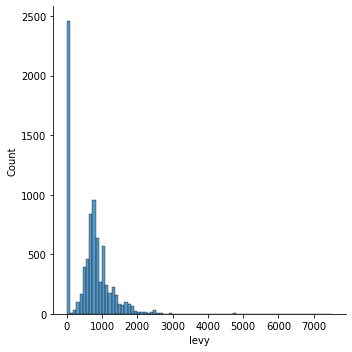

In [103]:
sns.displot(dftest['levy'].fillna(1))

### test-manufacturer

In [123]:
df.loc[df['manufacturer'] == 'TATA']

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,turbo,price,logprice


In [121]:
set(df['manufacturer'].unique()) - set(dftest['manufacturer'].unique())
set(dftest['manufacturer'].unique()) - set(df['manufacturer'].unique())

{'FOTON', 'MG', 'TATA'}

### test-model

In [ ]:
set(dftest['manufacturer'].unique()) - set(df['manufacturer'].unique())

In [129]:
len(set(dftest['model'].unique()) - set(df['model'].unique()))

391

### Need to take full train+test for proper categorical embedding

### test-prod

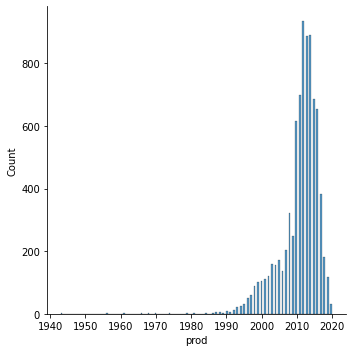

In [131]:
sns.displot(dftest['prod'])

### test-category

In [135]:
len(set(dftest['category'].unique()) - set(df['category'].unique()))

0

### Need to drop duplicate columns

In [48]:
clean = pd.read_csv('train_cleaned.csv')
clean = clean.drop('Unnamed: 0', axis=1)
clean.head(2)

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo,logprice
0,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,left,Silver,12,13328,0,9.497622
1,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,left,Black,8,16621,0,9.718422


In [55]:
df.shape

(19237, 19)

In [56]:
df.to_csv('train_cleaned_full.csv', index=False)

In [27]:
clean.duplicated().sum(), df.duplicated().sum()

(3512, 3512)

In [28]:
clean = clean.drop_duplicates()
df = df.drop_duplicates()

In [29]:
clean.shape, df.shape

((15724, 19), (15725, 19))

In [50]:
clean.shape

(19236, 19)

In [49]:
dff = pd.concat([clean, df], ignore_index=True)
dff.shape

(38473, 19)

In [51]:
dff.duplicated().sum()

20289

In [52]:
20289 - 3512

16777

### Isolation forest for outlier removal

### 07-07-2021

In [69]:
# df = pd.read_csv('train_cleaned.csv')
# df['levy'] = df['levy'].fillna(df['levy'].mean())
# dfc = df.copy()
df.shape

(19236, 18)

In [70]:
df.head(2)

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo
0,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6,Automatic,4x4,4,left,Silver,12,9.497622,0
1,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6,Tiptronic,4x4,4,left,Black,8,9.718422,0


In [47]:
from sklearn.model_selection import train_test_split

In [71]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

In [72]:
df.isna().sum().sum()

5818

In [108]:
price = df.pop('price')
df.shape

(19236, 19)

In [53]:
df.head(2)

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,turbo
0,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6,Automatic,4x4,4,left,Silver,12,0
1,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6,Tiptronic,4x4,4,left,Black,8,0


In [74]:
numeric_cols = list(df.select_dtypes(include=np.number).columns)
categorical_cols = list(df.select_dtypes('object').columns)

In [75]:
categorical_cols[:2]

['manufacturer', 'model']

In [76]:
df[numeric_cols].head(2)

,levy,prod,leather,engine,mileage,cylinders,doors,airbags,turbo
0,1399.0,2010,1,3.5,186005,6,4,12,0
1,1018.0,2011,0,3.0,192000,6,4,8,0


In [57]:
df[categorical_cols].head(2)

,manufacturer,model,category,fuel,gear,drive,wheel,color
0,LEXUS,RX 450,Jeep,Hybrid,Automatic,4x4,left,Silver
1,CHEVROLET,Equinox,Jeep,Petrol,Tiptronic,4x4,left,Black


In [77]:
scaler = MinMaxScaler()
scaler.fit(df[numeric_cols])
df[numeric_cols] = scaler.transform(df[numeric_cols])

imputer = SimpleImputer(strategy = 'median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])

In [78]:
# USING PANDAS GET_DUMMIES
dff = pd.concat([df[numeric_cols], pd.get_dummies(df[categorical_cols])],axis=1)
dff.shape

(19236, 1707)

In [79]:
dff.select_dtypes('float64').head(2)

,levy,prod,leather,engine,mileage,cylinders,doors,airbags,turbo
0,0.11288,0.876543,1.0,0.175,0.000087,0.333333,0.666667,0.75,0.0
1,0.08010,0.888889,0.0,0.150,0.000089,0.333333,0.666667,0.50,0.0


In [80]:
dff.isna().sum().sum()

levy              0
prod              0
leather           0
engine            0
mileage           0
                 ..
color_Red         0
color_Silver      0
color_Sky blue    0
color_White       0
color_Yellow      0
Length: 1707, dtype: int64

In [144]:
def isolation_forest_outliers(df, contamination = 0.1):
    dff = df.copy()
    price_ = dff.pop('price')
    numeric_cols = list(dff.select_dtypes(include=np.number).columns)
    categorical_cols = list(dff.select_dtypes('object').columns)
    scaler = MinMaxScaler()
    scaler.fit(dff[numeric_cols])
    df[numeric_cols] = scaler.transform(dff[numeric_cols])

    imputer = SimpleImputer(strategy = 'median')
    dff[numeric_cols] = imputer.fit_transform(dff[numeric_cols])
    
    dff = pd.concat([dff[numeric_cols], pd.get_dummies(dff[categorical_cols])],axis=1)
    
    is_forest = IsolationForest(contamination = contamination)
    is_forest.fit(dff.values)
    preds = is_forest.predict(dff.values)
    scores = is_forest.score_samples(dff.values)
    
    dff['ifscores'] = scores
    dff['ifinlier'] = preds
    dff['ifinlier'] = dff['ifinlier'].map({1:True,-1:False})
    
    return dff['ifinlier'].values

def if_outliers(df, contamination = 0.1):
    dff = df.copy()
    is_forest = IsolationForest(contamination = contamination)
    is_forest.fit(dff.values)
    preds = is_forest.predict(dff.values)
    scores = is_forest.score_samples(dff.values)
    
    dff['ifscores'] = scores
    dff['ifinlier'] = preds
    dff['ifinlier'] = dff['ifinlier'].map({1:True,-1:False})
    
    return dff['ifinlier'].values

In [81]:
is_forest = IsolationForest(contamination = 0.15)

In [82]:
is_forest.fit(dff)

IsolationForest(contamination=0.15)

In [83]:
preds = is_forest.predict(dff)

In [84]:
scores = is_forest.score_samples(dff.values)

In [92]:
df['ifscores'] = scores
df['ifinlier'] = preds
df['ifinlier'] = df['ifinlier'].map({1:1,-1:0})
df['ifinlier'].value_counts()

1    16351
0     2885
Name: ifinlier, dtype: int64

In [95]:
df.groupby('ifinlier')['ifscores'].mean()

ifinlier
0   -0.356584
1   -0.332436
Name: ifscores, dtype: float64

In [96]:
df.loc[df['ifinlier'] == 0].sort_values('ifscores')[:8]

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,turbo,ifscores,ifinlier
3764,0.148327,LEXUS,GX 470,0.876543,Jeep,1.0,Petrol,0.23,0.000166,0.466667,Automatic,4x4,0.666667,left,Grey,0.0,0.0,-0.383719,0
13827,0.148327,LEXUS,GX 470,0.876543,Jeep,1.0,Petrol,0.23,0.000166,0.466667,Automatic,4x4,0.666667,left,Grey,0.0,0.0,-0.383719,0
7631,0.148327,LEXUS,GX 470,0.876543,Jeep,1.0,Petrol,0.23,0.000166,0.466667,Automatic,4x4,0.666667,left,Grey,0.0,0.0,-0.383719,0
13642,0.148327,LEXUS,GX 470,0.876543,Jeep,1.0,Petrol,0.23,0.000166,0.466667,Automatic,4x4,0.666667,left,Grey,0.0,0.0,-0.383719,0
11649,0.148327,LEXUS,GX 470,0.876543,Jeep,1.0,Petrol,0.23,0.000166,0.466667,Automatic,4x4,0.666667,left,Grey,0.0,0.0,-0.383719,0
1625,0.148327,LEXUS,GX 470,0.876543,Jeep,1.0,Petrol,0.23,0.000166,0.466667,Automatic,4x4,0.666667,left,Grey,0.0,0.0,-0.383719,0
15829,0.148327,LEXUS,GX 470,0.876543,Jeep,1.0,Petrol,0.23,0.000166,0.466667,Automatic,4x4,0.666667,left,Grey,0.0,0.0,-0.383719,0
17094,0.148327,LEXUS,GX 470,0.876543,Jeep,1.0,Petrol,0.23,0.000166,0.466667,Automatic,4x4,0.666667,left,Grey,0.0,0.0,-0.383719,0


In [106]:
df.loc[df['ifinlier'] == 1].sort_values('ifscores')[:8]

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,turbo,ifscores,ifinlier
3964,0.053343,SSANGYONG,REXTON,0.888889,Jeep,1.0,Diesel,0.1,0.000025,0.200000,Automatic,Front,0.666667,left,Black,0.25,0.0,-0.349115,1
6978,0.047578,SSANGYONG,REXTON,0.913580,Jeep,1.0,Diesel,0.1,0.000025,0.200000,Automatic,Front,0.666667,left,Black,0.25,0.0,-0.349115,1
13063,0.047578,SSANGYONG,REXTON,0.913580,Jeep,1.0,Diesel,0.1,0.000022,0.200000,Automatic,Front,0.666667,left,Black,0.25,0.0,-0.349115,1
12680,0.047578,SSANGYONG,REXTON,0.913580,Jeep,1.0,Diesel,0.1,0.000025,0.200000,Automatic,Front,0.666667,left,Black,0.25,0.0,-0.349115,1
3167,0.047492,SSANGYONG,REXTON,0.925926,Jeep,1.0,Diesel,0.1,0.000024,0.200000,Automatic,Front,0.666667,left,Black,0.25,0.0,-0.349115,1
13952,0.047578,SSANGYONG,REXTON,0.913580,Jeep,1.0,Diesel,0.1,0.000022,0.200000,Automatic,Front,0.666667,left,Black,0.25,0.0,-0.349115,1
5583,0.053343,SSANGYONG,REXTON,0.888889,Jeep,1.0,Diesel,0.1,0.000025,0.200000,Automatic,Front,0.666667,left,Black,0.25,0.0,-0.349115,1
18554,0.128968,NISSAN,X-Terra,0.876543,Jeep,0.0,Petrol,0.2,0.000088,0.333333,Automatic,4x4,0.666667,left,Grey,0.50,0.0,-0.349114,1


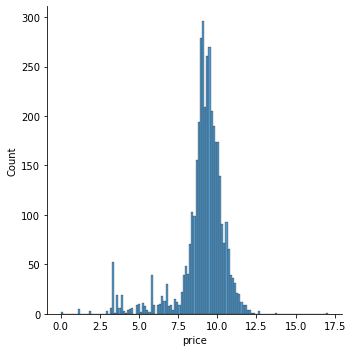

In [119]:
sns.displot(x=np.log(dfc.loc[df['isf_inlier'] == -1]['price']))

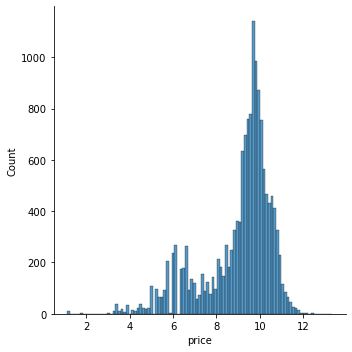

In [116]:
sns.displot(x=np.log(dfc.loc[df['isf_inlier'] == 1]['price']))

### 09-07-2021 -  imputing levy column using RF

In [3]:
df = pd.read_csv('train_cleaned.csv')
df.shape

(19237, 18)

In [4]:
df.head()

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo
0,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,left,Silver,12,13328,0
1,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,left,Black,8,16621,0
2,NaN,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,4,right,Black,2,8467,0
3,862.0,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,4,left,White,0,3607,0
4,446.0,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,4,left,Silver,4,11726,0


- use logprice instead of price
- impute levy with random forest
- add 'LEVY_NA' column


In [6]:
df.loc[[16983]]

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo
16983,NaN,OPEL,Combo,1999,Goods wagon,0,Diesel,1.7,99999,4.0,Manual,Front,2,left,Blue,0,26307500,0


In [7]:
orig_price = df['price']
df['price'] = np.log(df['price'])

In [9]:
df.isna().sum()

levy            5819
manufacturer       0
model              0
prod               0
category           0
leather            0
fuel               0
engine             0
mileage            0
cylinders          0
gear               0
drive              0
doors              0
wheel              0
color              0
airbags            0
price              0
turbo              0
dtype: int64

In [10]:
df.head(2)

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo
0,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,left,Silver,12,9.497622,0
1,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,left,Black,8,9.718422,0


In [13]:
input_cols = list(df.drop('price', axis=1).columns)
input_cols

['levy',
 'manufacturer',
 'model',
 'prod',
 'category',
 'leather',
 'fuel',
 'engine',
 'mileage',
 'cylinders',
 'gear',
 'drive',
 'doors',
 'wheel',
 'color',
 'airbags',
 'turbo']

In [14]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(
    df[input_cols].values,
    df['price'].values,
    test_size = 0.3
)

In [87]:
train_inputs.shape, val_inputs.shape, train_targets.shape, val_targets.shape

((13465, 17), (5772, 17), (13465,), (5772,))

### try to impute levy by predicting with RF (using levy column directly, without log transform)

In [88]:
df['levy_na'] = df['levy'].apply(lambda x: pd.isna(x))
df['levy_na'].sum()

5819

In [89]:
df.loc[~df['levy_na']].shape, df.loc[df['levy_na']].shape

((13418, 19), (5819, 19))

In [90]:
levy_train = df.drop(['price','levy_na'], axis=1).loc[~df['levy_na']]
levy_test = df.drop(['price','levy','levy_na'],axis=1).loc[df['levy_na']]
levy_train.shape, levy_test.shape

((13418, 17), (5819, 16))

In [91]:
levy_train.head(2)

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,turbo
0,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,left,Silver,12,0
1,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,left,Black,8,0


In [92]:
levy_test.head(2)

,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,turbo
2,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,4,right,Black,2,0
9,LEXUS,RX 350,2007,Jeep,1,Petrol,3.5,128500,6.0,Automatic,4x4,4,left,Silver,12,0


#### transform levy train

In [93]:
from sklearn.preprocessing import OneHotEncoder
ohlevy = OneHotEncoder(sparse=False, handle_unknown='ignore')

In [94]:
ohlevy.fit(df.select_dtypes('object'))

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [95]:
encoded_cols = list(ohlevy.get_feature_names(list(df.select_dtypes('object').columns)))
print(len(encoded_cols))
encoded_cols[:3]

1698


['manufacturer_ACURA', 'manufacturer_ALFA ROMEO', 'manufacturer_ASTON MARTIN']

In [96]:
categorical_cols = levy_train.select_dtypes('object').columns
categorical_cols

Index(['manufacturer', 'model', 'category', 'fuel', 'gear', 'drive', 'wheel',
       'color'],
      dtype='object')

In [97]:
df.select_dtypes('object').head(2)

,manufacturer,model,category,fuel,gear,drive,wheel,color
0,LEXUS,RX 450,Jeep,Hybrid,Automatic,4x4,left,Silver
1,CHEVROLET,Equinox,Jeep,Petrol,Tiptronic,4x4,left,Black


In [158]:
levy_train.head(2)

,levy,prod,leather,engine,mileage,cylinders,doors,airbags,turbo,manufacturer_ACURA,...,color_Green,color_Grey,color_Orange,color_Pink,color_Purple,color_Red,color_Silver,color_Sky blue,color_White,color_Yellow
0,1399.0,2010,1,3.5,186005,6.0,4,12,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1018.0,2011,0,3.0,192000,6.0,4,8,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [99]:
levy_encoded = pd.DataFrame(ohlevy.transform(levy_train.select_dtypes('object')), columns= encoded_cols)
levy_encoded.shape

(13418, 1698)

In [100]:
levy_encoded.head(2)

,manufacturer_ACURA,manufacturer_ALFA ROMEO,manufacturer_ASTON MARTIN,manufacturer_AUDI,manufacturer_BENTLEY,manufacturer_BMW,manufacturer_BUICK,manufacturer_CADILLAC,manufacturer_CHEVROLET,manufacturer_CHRYSLER,...,color_Green,color_Grey,color_Orange,color_Pink,color_Purple,color_Red,color_Silver,color_Sky blue,color_White,color_Yellow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [101]:
levy_train.index

Int64Index([    0,     1,     3,     4,     5,     6,     7,     8,    10,
               13,
            ...
            19222, 19225, 19227, 19228, 19230, 19231, 19233, 19234, 19235,
            19236],
           dtype='int64', length=13418)

In [102]:
levy_encoded = levy_encoded.reset_index(drop=True).set_index(levy_train.index)
levy_encoded.head()

,manufacturer_ACURA,manufacturer_ALFA ROMEO,manufacturer_ASTON MARTIN,manufacturer_AUDI,manufacturer_BENTLEY,manufacturer_BMW,manufacturer_BUICK,manufacturer_CADILLAC,manufacturer_CHEVROLET,manufacturer_CHRYSLER,...,color_Green,color_Grey,color_Orange,color_Pink,color_Purple,color_Red,color_Silver,color_Sky blue,color_White,color_Yellow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [103]:
levy_train.merge(levy_encoded, how='inner', left_index=True, right_index=True).columns[:20]

Index(['levy', 'manufacturer', 'model', 'prod', 'category', 'leather', 'fuel',
       'engine', 'mileage', 'cylinders', 'gear', 'drive', 'doors', 'wheel',
       'color', 'airbags', 'turbo', 'manufacturer_ACURA',
       'manufacturer_ALFA ROMEO', 'manufacturer_ASTON MARTIN'],
      dtype='object')

In [104]:
# MERGE GOING ON, RUN WITH CAUTION
levy_train = levy_train.merge(levy_encoded, how='inner', left_index=True, right_index=True)

In [105]:
levy_train = levy_train.drop(categorical_cols, axis=1)
levy_train.head(3)

,levy,prod,leather,engine,mileage,cylinders,doors,airbags,turbo,manufacturer_ACURA,...,color_Green,color_Grey,color_Orange,color_Pink,color_Purple,color_Red,color_Silver,color_Sky blue,color_White,color_Yellow
0,1399.0,2010,1,3.5,186005,6.0,4,12,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,1018.0,2011,0,3.0,192000,6.0,4,8,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,862.0,2011,1,2.5,168966,4.0,4,0,0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [107]:
levy_train.columns[:12]

Index(['levy', 'prod', 'leather', 'engine', 'mileage', 'cylinders', 'doors',
       'airbags', 'turbo', 'manufacturer_ACURA', 'manufacturer_ALFA ROMEO',
       'manufacturer_ASTON MARTIN'],
      dtype='object')

####  transform levy test

In [115]:
levy_test.shape

(5819, 16)

In [116]:
levy_test_encoded = pd.DataFrame(ohlevy.transform(levy_test.select_dtypes('object')), columns= encoded_cols)
levy_test_encoded.shape

(5819, 1698)

In [118]:
levy_test_encoded = levy_test_encoded.reset_index(drop=True).set_index(levy_test.index)

In [121]:
levy_test_encoded.head(3)

,manufacturer_ACURA,manufacturer_ALFA ROMEO,manufacturer_ASTON MARTIN,manufacturer_AUDI,manufacturer_BENTLEY,manufacturer_BMW,manufacturer_BUICK,manufacturer_CADILLAC,manufacturer_CHEVROLET,manufacturer_CHRYSLER,...,color_Green,color_Grey,color_Orange,color_Pink,color_Purple,color_Red,color_Silver,color_Sky blue,color_White,color_Yellow
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [125]:
# MERGE GOING ON, RUN WITH CAUTION
levy_test = levy_test.merge(levy_test_encoded, how='inner', left_index=True, right_index=True)
levy_test.shape

(5819, 1714)

In [126]:
levy_test = levy_test.drop(categorical_cols, axis=1)
levy_test.shape

(5819, 1706)

In [128]:
levy_test.head(2)

,prod,leather,engine,mileage,cylinders,doors,airbags,turbo,manufacturer_ACURA,manufacturer_ALFA ROMEO,...,color_Green,color_Grey,color_Orange,color_Pink,color_Purple,color_Red,color_Silver,color_Sky blue,color_White,color_Yellow
2,2006,0,1.3,200000,4.0,4,2,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,2007,1,3.5,128500,6.0,4,12,0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### fitting RF to predict levy for rows where levy is null (without log transforming levy)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rflevy = RandomForestRegressor(max_depth = 20, n_estimators = 50, max_leaf_nodes = 256)

In [109]:
rflevy.fit(levy_train.drop('levy', axis=1).values, levy_train['levy'].values)

RandomForestRegressor(max_depth=20, max_leaf_nodes=256, n_estimators=50)

In [148]:
levy_train_preds = rflevy.predict(levy_train.drop('levy', axis=1).values)
levy_train_preds

array([1400.01270052, 1018.16867518,  841.27786236, ...,  835.75770736,
       1280.93940236,  752.3918122 ])

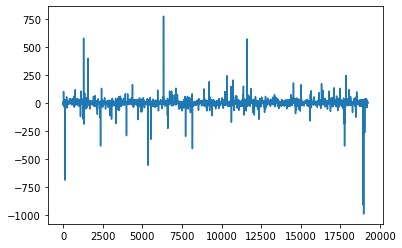

In [151]:
(levy_train_preds - levy_train['levy']).plot()

In [129]:
levy_test_preds = rflevy.predict(levy_test.values)

In [137]:
levy_test_preds

array([3245.538     , 2164.81870638, 3341.33338095, ..., 6414.568     ,
        841.43257887, 1687.01000238])

### inserting predicted levy into original dataframe

In [133]:
df['levy_pred'] = np.nan
df['levy_log_pred'] = np.nan

In [144]:
df.loc[levy_test.index, 'levy_pred'] = levy_test_preds
df.loc[levy_train.index, 'levy_pred'] = levy_train['levy']
df['levy_pred'].isna().sum()

0

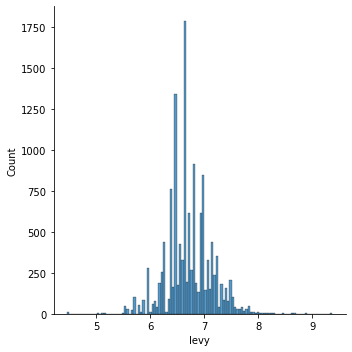

In [155]:
sns.displot(x= np.log(df['levy']))

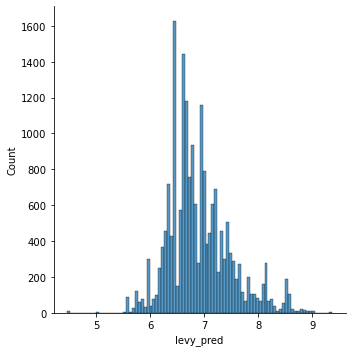

In [145]:
sns.displot(x= np.log(df['levy_pred']))

### predicting log levy

In [156]:
rfloglevy = RandomForestRegressor(max_depth = 20, n_estimators = 50, max_leaf_nodes = 256)

In [159]:
rfloglevy.fit(levy_train.drop('levy', axis=1).values, np.log(levy_train['levy'].values))

RandomForestRegressor(max_depth=20, max_leaf_nodes=256, n_estimators=50)

In [160]:
levy_train_log_preds = rfloglevy.predict(levy_train.drop('levy', axis=1).values)
levy_train_log_preds

array([7.24449752, 6.92598758, 6.7347605 , ..., 6.7283129 , 7.1557021 ,
       6.62323813])

In [162]:
levy_test_log_preds = rfloglevy.predict(levy_test.values)
levy_test_log_preds

array([7.84375871, 7.62627427, 8.09823537, ..., 8.70952652, 6.73614358,
       7.44688582])

In [163]:
df.head()

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,...,drive,doors,wheel,color,airbags,price,turbo,levy_na,levy_pred,levy_log_pred
0,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,...,4x4,4,left,Silver,12,9.497622,0,False,1399.000,NaN
1,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,...,4x4,4,left,Black,8,9.718422,0,False,1018.000,NaN
2,NaN,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,...,Front,4,right,Black,2,9.043932,0,True,3245.538,NaN
3,862.0,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,...,4x4,4,left,White,0,8.190632,0,False,862.000,NaN
4,446.0,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4.0,...,Front,4,left,Silver,4,9.369564,0,False,446.000,NaN


In [166]:
np.log(levy_train['levy'])

0        7.243513
1        6.925595
3        6.759255
4        6.100319
5        6.792344
           ...   
19231    6.961296
19233    6.722630
19234    6.728629
19235    7.160846
19236    6.624065
Name: levy, Length: 13418, dtype: float64

In [167]:
df.loc[levy_test.index, 'levy_log_pred'] = levy_test_log_preds
df.loc[levy_train.index, 'levy_log_pred'] = np.log(levy_train['levy'])

In [168]:
df.head(2)

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,...,drive,doors,wheel,color,airbags,price,turbo,levy_na,levy_pred,levy_log_pred
0,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,...,4x4,4,left,Silver,12,9.497622,0,False,1399.0,7.243513
1,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,...,4x4,4,left,Black,8,9.718422,0,False,1018.0,6.925595


In [170]:
df['price'] = orig_price
df['logprice'] = np.log(orig_price)
df.head(2)

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,...,doors,wheel,color,airbags,price,turbo,levy_na,levy_pred,levy_log_pred,logprice
0,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,...,4,left,Silver,12,13328,0,False,1399.0,7.243513,9.497622
1,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,...,4,left,Black,8,16621,0,False,1018.0,6.925595,9.718422


In [171]:
df.to_excel('train_levy_imputed.xlsx')

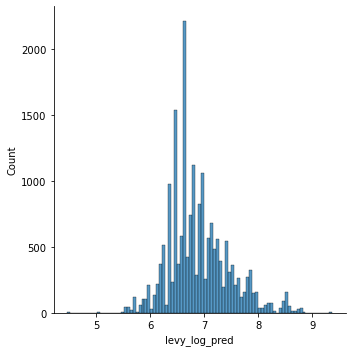

In [175]:
sns.displot(x= df['levy_log_pred'])

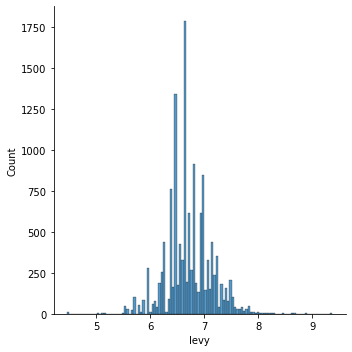

In [173]:
sns.displot(x= np.log(df['levy']))

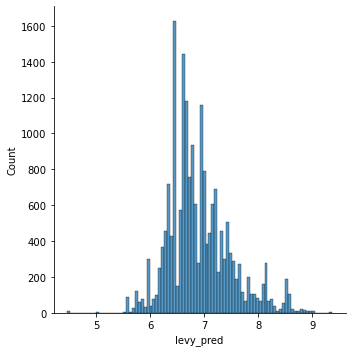

In [177]:
sns.displot(x= np.log(df['levy_pred']))

### prediction final

In [2]:
df = pd.read_csv('train_imputed.csv')
df.shape

(19237, 22)

In [3]:
df.head(2)

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo,levy_na,levy_pred,levy_log_pred,logprice
0,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6,Automatic,4x4,4,left,Silver,12,13328,0,False,1399.0,7.243513,9.497622
1,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6,Tiptronic,4x4,4,left,Black,8,16621,0,False,1018.0,6.925595,9.718422


In [4]:
# df['levy'] = df['levy_pred']
df['price'] = df['logprice']
df = df.drop(['levy_pred','levy_log_pred','logprice'], axis=1)
df.head(2)

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo,levy_na
0,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6,Automatic,4x4,4,left,Silver,12,9.497622,0,False
1,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6,Tiptronic,4x4,4,left,Black,8,9.718422,0,False


In [5]:
df.isna().sum().sum()

5819

In [61]:
df.to_csv('train_levy_median.csv')

In [6]:
# df = pd.read_csv('train_levy_median.csv')

In [6]:
df.isna().sum().sum()

5819

#### scaling numeric columns

In [10]:
# input_cols = list(df.drop('price', axis=1).columns)
# len(input_cols)

18

In [11]:
# numeric_cols = list(df[input_cols].select_dtypes(np.number).columns)
# categorical_cols = list(df[input_cols].select_dtypes('object').columns)

In [12]:
# from sklearn.preprocessing import MinMaxScaler
# minmax = MinMaxScaler()
# df[numeric_cols] = minmax.fit_transform(df[numeric_cols])

In [13]:
# from sklearn.model_selection import train_test_split
# train_inputs, val_inputs, train_targets, val_targets = train_test_split(df[input_cols],
#                                                                        df['price'],
#                                                                        test_size=0.3)

In [14]:
train_inputs.shape, val_inputs.shape, train_targets.shape, val_targets.shape

((13465, 18), (5772, 18), (13465,), (5772,))

In [15]:
len(numeric_cols), len(categorical_cols)

(9, 8)

In [46]:
df['model'].astype('category').cat.categories

Index(['09-Mar', '100', '100 NX', '1000', '1111', '114', '116', '118',
       '118 2,0', '118 M-sport LCI',
       ...
       'Zafira B', 'i20', 'i3', 'i40', 'iA isti', 'kona', 'macan', 'macan S',
       'tC', 'xD'],
      dtype='object', length=1590)

#### scaling

In [ ]:
input_cols = list(df.drop('price', axis=1).columns)
len(input_cols)

In [ ]:
numeric_cols = list(df[input_cols].select_dtypes(np.number).columns)
categorical_cols = list(df[input_cols].select_dtypes('object').columns)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler()
df[numeric_cols] = minmax.fit_transform(df[numeric_cols])

In [ ]:
from sklearn.model_selection import train_test_split
train_inputs, val_inputs, train_targets, val_targets = train_test_split(df[input_cols],
                                                                       df['price'],
                                                                       test_size=0.3)

#### imputing median

In [18]:
from sklearn.impute import SimpleImputer
imputer_med = SimpleImputer(strategy='median')
imputer_med.fit(train_inputs[numeric_cols])
train_inputs[numeric_cols] = imputer_med.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = imputer_med.transform(val_inputs[numeric_cols])

#### one-hot encoding train categorical data

In [21]:
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder(sparse=False, handle_unknown = 'ignore')
oh.fit(df[categorical_cols])
encoded_cols = list(oh.get_feature_names(categorical_cols))

train_inputs[encoded_cols] = oh.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = oh.transform(val_inputs[categorical_cols])

#### getting final x_train, x_val

In [ ]:
x_train = train_inputs[numeric_cols+encoded_cols]
x_val = val_inputs[numeric_cols+encoded_cols]

x_train.shape, x_val.shape, train_targets.shape, val_targets.shape

In [22]:
# oh.fit(df[categorical_cols])
# encoded_cols = list(oh.get_feature_names(categorical_cols))
# len(encoded_cols)

1698

In [23]:
encoded_cols[:4]

['manufacturer_ACURA',
 'manufacturer_ALFA ROMEO',
 'manufacturer_ASTON MARTIN',
 'manufacturer_AUDI']

In [24]:
# train_inputs[encoded_cols] = oh.transform(train_inputs[categorical_cols])
# val_inputs[encoded_cols] = oh.transform(val_inputs[categorical_cols])

In [25]:
train_inputs[numeric_cols+encoded_cols].head(2)

,levy,prod,leather,engine,mileage,cylinders,doors,airbags,turbo,manufacturer_ACURA,manufacturer_ALFA ROMEO,manufacturer_ASTON MARTIN,manufacturer_AUDI,manufacturer_BENTLEY,manufacturer_BMW,manufacturer_BUICK,manufacturer_CADILLAC,manufacturer_CHEVROLET,manufacturer_CHRYSLER,manufacturer_CITROEN,manufacturer_DAEWOO,manufacturer_DAIHATSU,manufacturer_DODGE,manufacturer_FERRARI,manufacturer_FIAT,manufacturer_FORD,manufacturer_GAZ,manufacturer_GMC,manufacturer_GREATWALL,manufacturer_HAVAL,manufacturer_HONDA,manufacturer_HUMMER,manufacturer_HYUNDAI,manufacturer_INFINITI,manufacturer_ISUZU,manufacturer_JAGUAR,manufacturer_JEEP,manufacturer_KIA,manufacturer_LAMBORGHINI,manufacturer_LANCIA,manufacturer_LAND ROVER,manufacturer_LEXUS,manufacturer_LINCOLN,manufacturer_MASERATI,manufacturer_MAZDA,manufacturer_MERCEDES-BENZ,manufacturer_MERCURY,manufacturer_MINI,manufacturer_MITSUBISHI,manufacturer_MOSKVICH,manufacturer_NISSAN,manufacturer_OPEL,manufacturer_PEUGEOT,manufacturer_PONTIAC,manufacturer_PORSCHE,manufacturer_RENAULT,manufacturer_ROLLS-ROYCE,manufacturer_ROVER,manufacturer_SAAB,manufacturer_SATURN,manufacturer_SCION,manufacturer_SEAT,manufacturer_SKODA,manufacturer_SSANGYONG,manufacturer_SUBARU,manufacturer_SUZUKI,manufacturer_TESLA,manufacturer_TOYOTA,manufacturer_UAZ,manufacturer_VAZ,manufacturer_VOLKSWAGEN,manufacturer_VOLVO,manufacturer_ZAZ,manufacturer_სხვა,model_09-Mar,model_100,model_100 NX,model_1000,model_1111,model_114,model_116,model_118,"model_118 2,0",model_118 M-sport LCI,model_120,model_128,model_128 M tech,model_130,model_1300,model_135,model_147,model_1500,"model_1500,1600 Schtufenheck",model_159,model_166,model_190,model_20,model_200,model_206,model_206 CC,...,model_X5,model_X5 3.0,model_X5 3.0i,model_X5 3.5,model_X5 35d,"model_X5 4,4i",model_X5 4.8is,model_X5 DIESEL,model_X5 E70,model_X5 Japan,model_X5 M,model_X5 M packet,model_X5 Sport,model_X5 X-Drive,model_X5 XDRIVE,model_X5 XDRIVE 35D,model_X5 e53,model_X5 rest,model_X5 restilling,model_X5 x5,model_X6,model_X6 40D,model_X6 GERMANY,model_X6 Limited,model_X6 M,model_XC90,model_XC90 2.5turbo,model_XC90 3.2 AWD,model_XE,model_XF,model_XJ,model_XK,model_XL7,model_XL7 limited,model_XV,model_XV HYBRID,model_XV LIMITED,model_YRV,model_Yaris,model_Yaris IA,model_Yaris RS,model_Yaris SE,model_Yaris iA,model_Yukon,model_Z4,"model_Z4 3,0 SI",model_Zafira,model_Zafira B,model_i20,model_i3,model_i40,model_iA isti,model_kona,model_macan,model_macan S,model_tC,model_xD,category_Cabriolet,category_Coupe,category_Goods wagon,category_Hatchback,category_Jeep,category_Limousine,category_Microbus,category_Minivan,category_Pickup,category_Sedan,category_Universal,fuel_CNG,fuel_Diesel,fuel_Hybrid,fuel_Hydrogen,fuel_LPG,fuel_Petrol,fuel_Plug-in Hybrid,gear_Automatic,gear_Manual,gear_Tiptronic,gear_Variator,drive_4x4,drive_Front,drive_Rear,wheel_left,wheel_right,color_Beige,color_Black,color_Blue,color_Brown,color_Carnelian red,color_Golden,color_Green,color_Grey,color_Orange,color_Pink,color_Purple,color_Red,color_Silver,color_Sky blue,color_White,color_Yellow
8254,0.096705,0.876543,1.0,0.150,0.000101,0.333333,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
16233,0.112880,0.876543,1.0,0.175,0.000088,0.333333,0.666667,0.75,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0

#### getting final x_train, x_val

In [49]:
training_cols = numeric_cols+encoded_cols
len(training_cols)

1707

In [32]:
# x_train = train_inputs[numeric_cols+encoded_cols]
# x_val = val_inputs[numeric_cols+encoded_cols]

In [33]:
x_train.shape, x_val.shape, train_targets.shape, val_targets.shape

((13465, 1707), (5772, 1707), (13465,), (5772,))

### fitting with regularised decision tree

,0,hyperparams,model,time,train_error,val_error
100,NaN,3,2,1,4,5
0,2.0,NaN,NaN,NaN,NaN,NaN
1,3.0,NaN,NaN,NaN,NaN,NaN
2,4.0,NaN,NaN,NaN,NaN,NaN
3,5.0,NaN,NaN,NaN,NaN,NaN
4,6.0,NaN,NaN,NaN,NaN,NaN


In [94]:
log.tail()

,Date,Outlier rows dropped,Outlier technique,Levy or log levy,Train-duplicates dropped,Col for prediction (price/logprice),Numeric Imputation,Categorical Imputation,Split ratio,machicnehack test set used for categorical imputaton,estimator,hyperparams,train_RMSLE,val_RMSLE
9,2021-07-09 23:46:49.473958,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"RandomForestRegressor(max_depth=20, min_sample...","'bootstrap': True, 'ccp_alpha': 0.0, 'criterio...",0.709734,0.984271
10,2021-07-09 23:48:57.225552,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"RandomForestRegressor(max_depth=17, min_sample...","'bootstrap': True, 'ccp_alpha': 0.0, 'criterio...",0.792199,1.007534
11,2021-07-09 23:52:11.173612,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"RandomForestRegressor(max_depth=13, random_sta...","'bootstrap': True, 'ccp_alpha': 0.0, 'criterio...",0.795357,1.037197
12,2021-07-10 10:58:00.765145,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DecisionTreeRegressor(random_state=21),"'ccp_alpha': 0.0, 'criterion': 'mse', 'max_dep...",0.177977,1.256361
13,2021-07-10 10:59:20.615528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DecisionTreeRegressor(max_leaf_nodes=512, rand...","'ccp_alpha': 0.0, 'criterion': 'mse', 'max_dep...",0.717742,1.154423


In [28]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [55]:
model = DecisionTreeRegressor(random_state=21, max_depth=25)
fit_predict(estimator=model)

Train RMSLE: 0.3317602971372327
Val RMSLE: 1.2628326715575295


In [56]:
model = DecisionTreeRegressor(random_state=21, max_depth=35, min_samples_leaf=5)
fit_predict(estimator=model)

Train RMSLE: 0.765591183394641
Val RMSLE: 1.1035667120882957


In [57]:
import pickle
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))

### RF

In [60]:
model = RandomForestRegressor(random_state=21, max_depth = 35)
fit_predict(model)

Train RMSLE: 0.3944736654672964
Val RMSLE: 0.9651959068257472


In [72]:
model = RandomForestRegressor(random_state=21, max_depth = 25, min_samples_split=20)
fit_predict(model)

Train RMSLE: 0.71852651505647
Val RMSLE: 0.9850246691666769


In [194]:
model = RandomForestRegressor(random_state=21, max_depth = 13)
fit_predict(model)

Train RMSLE: 0.795356668456494
Val RMSLE: 1.037196686823185


In [192]:
log.tail()

,Date,Outlier rows dropped,Outlier technique,Levy or log levy,Train-duplicates dropped,Col for prediction (price/logprice),Numeric Imputation,Categorical Imputation,Split ratio,machicnehack test set used for categorical imputaton,estimator,hyperparams,train_RMSLE,val_RMSLE
6,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RFRegressor,"random_state=21, max_depth=60",0.390,0.964
7,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,RFRegressor,"random_state=21, max_depth = 25, min_samples_s...",0.718,0.985
8,2021-07-09 23:38:52.862457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2021-07-09 23:39:07.094816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DecisionTreeRegressor(max_depth=28, min_sample...",NaN,NaN,NaN
10,2021-07-09 23:40:09.443746,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DecisionTreeRegressor(max_depth=28, min_sample...","'ccp_alpha': 0.0, 'criterion': 'mse', 'max_dep...",NaN,NaN


In [83]:
filename = 'rf_md25_mss20.sav'
pickle.dump(model, open(filename, 'wb'))

In [86]:
jovian.commit(project=project_name, privacy='private')

<IPython.core.display.Javascript object>

[jovian] Updating notebook "antariksh0094/carprice" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/antariksh0094/carprice


'https://jovian.ai/antariksh0094/carprice'

In [88]:
jovian.log_hyperparams({
    'max_depth':25,
    'min_samples_split':20
})

[jovian] Hyperparams logged.


In [89]:
jovian.log_metrics({
    'train_loss':0.718,
    'val_loss':0.985
})

[jovian] Metrics logged.


In [186]:
model = DecisionTreeRegressor(random_state=21, max_depth=28, min_samples_leaf=15)
fit_predict(estimator=model)

inside fit
['time' 'model' 'hyperparams' 'train_error' 'val_error']
Train RMSLE: 0.9602792094198195
Val RMSLE: 1.0941183996660795


In [195]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "antariksh0094/carprice" on https://jovian.ai/
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
[jovian] Committed successfully! https://jovian.ai/antariksh0094/carprice


'https://jovian.ai/antariksh0094/carprice'

### 10-07-2021

In [99]:
os.getcwd()
os.chdir('C:\\Users\\Anshu\\Data Science\\TheMathCompany-hackathon')
os.getcwd()

'C:\\Users\\Anshu\\Data Science\\TheMathCompany-hackathon'

In [101]:
model = DecisionTreeRegressor(random_state=21, max_leaf_nodes=200)
fit_predict(model)
log = pd.read_excel('model_params_metrics.xlsx')
log.tail(3)

Train RMSLE: 0.9514189905706221
Val RMSLE: 1.1537580661829472


,Date,Outlier rows dropped,Outlier technique,Levy or log levy,Train-duplicates dropped,Col for prediction (price/logprice),Numeric Imputation,Categorical Imputation,Split ratio,machicnehack test set used for categorical imputaton,estimator,hyperparams,train_RMSLE,val_RMSLE,test_RMSLE
13,2021-07-10 10:59:20.615528,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DecisionTreeRegressor(max_leaf_nodes=512, rand...","'ccp_alpha': 0.0, 'criterion': 'mse', 'max_dep...",0.717742,1.154423,NaN
14,2021-07-10 11:46:15.169460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DecisionTreeRegressor(max_leaf_nodes=300, rand...","'ccp_alpha': 0.0, 'criterion': 'mse', 'max_dep...",0.860650,1.143619,NaN
15,2021-07-10 11:46:33.970165,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"DecisionTreeRegressor(max_leaf_nodes=200, rand...","'ccp_alpha': 0.0, 'criterion': 'mse', 'max_dep...",0.951419,1.153758,NaN


#### transforming test data

In [36]:
dftest = pd.read_csv('test_cleaned.csv')
dftest.head(2)

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo
0,NaN,VOLKSWAGEN,Golf,2012,Hatchback,0,Diesel,2.0,0,4,Manual,Front,2,left,Grey,10,NaN,1
1,NaN,HYUNDAI,Sonata,2012,Sedan,1,Petrol,2.4,26000,4,Tiptronic,Front,4,left,Grey,10,NaN,0


In [37]:
dftest.isna().sum()

levy            2454
manufacturer       0
model              0
prod               0
category           0
leather            0
fuel               0
engine             0
mileage            0
cylinders          0
gear               0
drive              0
doors              0
wheel              0
color              0
airbags            0
price           8245
turbo              0
dtype: int64

In [44]:
test_inputs = dftest.drop('price', axis=1)
test_inputs.shape

(8245, 17)

In [41]:
test_inputs[numeric_cols] = imputer_med.transform(test_inputs[numeric_cols])

In [45]:
test_inputs[numeric_cols] = minmax.transform(test_inputs[numeric_cols])

In [46]:
test_inputs[encoded_cols] = oh.transform(test_inputs[categorical_cols])

In [51]:
test_inputs = test_inputs[training_cols]
test_inputs.shape

(8245, 1707)

In [102]:
test_preds = model.predict(test_inputs.values)
test_preds = np.exp(test_preds)
dfsubmit = pd.DataFrame(test_preds, columns = ['Price'])
submit_file = str(datetime.now().strftime("%Y-%m-%d %H:%M:%S")).replace(' ','_') + '.csv'
submit_file = submit_file.replace(':','_')
print(submit_file)
root_path= 'C:\\Users\\Anshu\\Data Science\\TheMathCompany-hackathon\\submissions\\'
dfsubmit.to_csv(root_path + submit_file, index=False)

2021-07-10_11_47_49.csv


In [110]:
jovian.commit(project=project_name)

<IPython.core.display.Javascript object>

[jovian] Updating notebook "antariksh0094/carprice" on https://jovian.ai/
[jovian] Committed successfully! https://jovian.ai/antariksh0094/carprice


'https://jovian.ai/antariksh0094/carprice'

In [120]:
df = pd.read_csv('train_cleaned_base.csv')
df['price'] = np.log(df['price'])
df = df.drop(16983)
df.shape

(19236, 18)

In [9]:
# df.to_csv('train_cleaned_base.csv', index=False) # base cleaned train file

In [19]:
df.sort_values('price', ascending=False)

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,turbo,price,logprice
16983,NaN,OPEL,Combo,1999,Goods wagon,0,Diesel,1.7,99999,4.0,Manual,Front,2,left,Blue,0,0,26307500,17.085365
8541,2068.0,LAMBORGHINI,Urus,2019,Universal,1,Petrol,4.0,2531,8.0,Tiptronic,4x4,4,left,Black,0,0,872946,13.679629
1225,NaN,MERCEDES-BENZ,G 65 AMG 63AMG,2020,Jeep,1,Petrol,6.3,0,8.0,Tiptronic,4x4,4,left,Black,12,1,627220,13.349053
5008,1694.0,PORSCHE,911,2016,Coupe,1,Petrol,4.0,8690,6.0,Automatic,Rear,2,left,Black,12,0,308906,12.640792
14839,NaN,LAND ROVER,Range Rover Vogue,2019,Jeep,1,Diesel,3.0,4500,8.0,Tiptronic,4x4,4,left,Black,12,1,297930,12.604614
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11636,NaN,MERCEDES-BENZ,C 220,1998,Sedan,0,Diesel,2.2,20600,4.0,Manual,Rear,4,left,Black,2,0,3,1.098612
221,NaN,HYUNDAI,Elantra,2011,Sedan,1,Petrol,1.8,80000,4.0,Tiptronic,Front,4,left,Grey,6,0,3,1.098612
4958,1502.0,VOLKSWAGEN,Jetta,2014,Sedan,1,Petrol,1.8,134400,4.0,Tiptronic,Front,4,right,Black,6,1,3,1.098612
16992,1202.0,CHEVROLET,Lacetti,2006,Hatchback,0,Petrol,1.6,200000,4.0,Manual,Front,4,left,Black,2,0,1,0.000000


### trying to identify outliers

In [21]:
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
iforest = IsolationForest()

In [27]:
le = LabelEncoder()
le.fit(df['model'].values)

LabelEncoder()

In [30]:
df['model'].nunique()

1590

In [29]:
len(le.classes_)

1590

In [34]:
df.head()

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,turbo,price,logprice
0,1399.0,LEXUS,RX 450,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,4x4,4,left,Silver,12,0,13328,9.497622
1,1018.0,CHEVROLET,Equinox,2011,Jeep,0,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,left,Black,8,0,16621,9.718422
2,NaN,HONDA,FIT,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,4,right,Black,2,0,8467,9.043932
3,862.0,FORD,Escape,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,4x4,4,left,White,0,0,3607,8.190632
4,446.0,HONDA,FIT,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,4,left,Silver,4,0,11726,9.369564


In [145]:
start = datetime.now()
inlier_index = isolation_forest_outliers(df, 0.15)

In [147]:
inlier_index.sum()

16350

In [148]:
df.loc[inlier_index]

,levy,manufacturer,model,prod,category,leather,fuel,engine,mileage,cylinders,gear,drive,doors,wheel,color,airbags,price,turbo
1,0.080100,CHEVROLET,Equinox,0.888889,Jeep,0.0,Petrol,0.150,0.000089,0.333333,Tiptronic,4x4,0.666667,left,Black,0.50,9.718422,0.0
3,0.066678,FORD,Escape,0.888889,Jeep,1.0,Hybrid,0.125,0.000079,0.200000,Automatic,4x4,0.666667,left,White,0.00,8.190632,0.0
4,0.030887,HONDA,FIT,0.925926,Hatchback,1.0,Petrol,0.065,0.000043,0.200000,Automatic,Front,0.666667,left,Silver,0.25,9.369564,0.0
5,0.069173,HYUNDAI,Santa FE,0.950617,Jeep,1.0,Diesel,0.100,0.000075,0.200000,Automatic,Front,0.666667,left,White,0.25,10.583879,0.0
6,0.057988,TOYOTA,Prius,0.876543,Hatchback,1.0,Hybrid,0.090,0.000121,0.200000,Automatic,Front,0.666667,left,White,0.75,7.497207,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,0.083283,MERCEDES-BENZ,E 350,0.913580,Sedan,1.0,Diesel,0.175,0.000050,0.333333,Automatic,Rear,0.666667,left,Grey,0.75,8.665958,0.0
19233,0.064011,HYUNDAI,Sonata,0.888889,Sedan,1.0,Petrol,0.120,0.000075,0.200000,Tiptronic,Front,0.666667,left,Red,0.50,9.660205,0.0
19234,0.064441,HYUNDAI,Tucson,0.876543,Jeep,1.0,Diesel,0.100,0.000054,0.200000,Automatic,Front,0.666667,left,Grey,0.25,10.169997,0.0
19235,0.103330,CHEVROLET,Captiva,0.839506,Jeep,1.0,Diesel,0.100,0.000024,0.200000,Automatic,Front,0.666667,left,Black,0.25,8.581294,0.0
